<a href="https://colab.research.google.com/github/sameen73/VinBigData_comp_repo/blob/main/img_2_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image to Numpy Conversion 

This code is meant to convert and store all images in the data_dump folder. The first step is to ensure that all images (if they haven't already) been converted into grayscale. Next, each image must be converted into a numpy array. Finally, each numpy array must be stored in a way such that the file identifier and the numpy array can be rejoined to the training dataset. 

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import PIL

In [ ]:
!ls

sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Use this in case you're in the wrong directory
%cd /content/drive/MyDrive/VinBigData_comp_gd_dir/data_dump/train

/content/drive/MyDrive/VinBigData_comp_gd_dir/data_dump/train


In [ ]:
!ls 

^C


In [ ]:
all_images_csv = pd.read_csv('/content/drive/MyDrive/VinBigData_comp_gd_dir/data_dump/train.csv')

In [ ]:
file_list = os.listdir('./')

In [ ]:
# Check to make sure the file_list has the correct information
for filename in file_list[0:10]:
  print(filename)

ee0038c59a1b52cd027e0108418e0500.png
ee04fa64f7e9a47abee0be3cfc22f5e7.png
ee0b9e8fd3ad717bfd391f0adc3f459e.png
ee0d65c2402ce79f2d7a66502b3ca321.png
ee1abdde3a0e65f9e0b832dfdbbea5de.png
ee1ce355f6de728da4c7a40715b16826.png
ee22245fccd39fca9be413a2b2bbe521.png
ee253aab2bfa090c01a596a449159233.png
ee25d885155b131723c1dba2921d7589.png
ee28d5fe8bad0f0e57d563a244ecc2f9.png


In [ ]:
# Function borrowed from StackOverflow user joaoricardo000
def is_grey_scale(img_path):
    img = Image.open(img_path).convert('RGB')
    w, h = img.size
    for i in range(w):
        for j in range(h):
            r, g, b = img.getpixel((i,j))
            if r != g != b: 
                return False
    return True

In [ ]:
# Counter should be 15000 if all images are grayscale
# Based on the output, it seems that all images are grayscale
counter = 0
non_gray = []
for filename in file_list:
  gray_bool = is_grey_scale(filename)
  if gray_bool is True:
    counter = counter + gray_bool
    print(str(counter) + " " + str(filename) + " : " + str(gray_bool))
  elif gray_bool is not True:
    counter = counter + gray_bool
    print(str(counter) + " " + str(filename) + " : " + str(gray_bool))
    non_gray.append(filename)

In [ ]:
"./" + file_list[0]

'./ee0038c59a1b52cd027e0108418e0500.png'

'Shell'

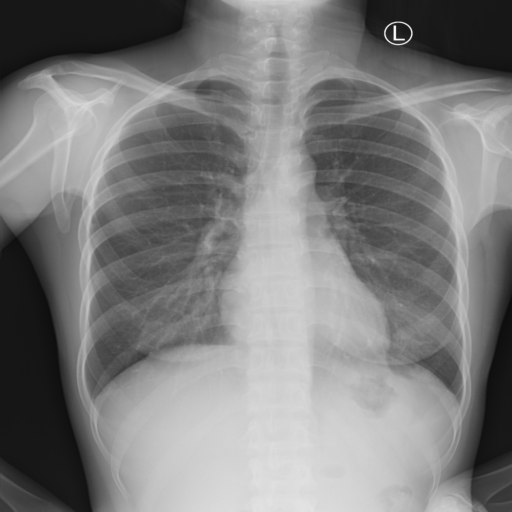

In [ ]:
# Open and inspect individual image
img = Image.open(fp = 'ee0038c59a1b52cd027e0108418e0500.png')
img

In [ ]:
img.size

(512, 512)

In [ ]:
all_images_csv.head(10)

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN
5,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,627.0,357.0,947.0,433.0
6,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,1347.0,245.0,2188.0,2169.0
7,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R9,557.0,2352.0,675.0,2484.0
8,d3637a1935a905b3c326af31389cb846,Aortic enlargement,0,R10,1329.0,743.0,1521.0,958.0
9,afb6230703512afc370f236e8fe98806,Pulmonary fibrosis,13,R9,1857.0,1607.0,2126.0,2036.0


## Creation of Pixel Array + identifer Object

In [ ]:
img_arrays = []
labels =  []
x_min = []
y_min = []
x_max = []
x_min = []
file_ids= []


In [37]:
import time
import re
import pickle
import _pickle as cPickle
import bz2

In [ ]:
tic = time.perf_counter()
for image in file_list[0:1000]:
  sub_list = [re.sub('.png', '', image)]
  img = Image.open(image)
  img = np.array(img)
  img = img / 255
  sub_list.append(img)
  img_arrays.append(sub_list)
toc = time.perf_counter()
print(toc-tic)

159.3888351380001


In [ ]:
len(img_arrays)

1000

In [ ]:
len(img_arrays[950])

2

In [ ]:
# Checking a random index for a proper file name (stripped of ".png" extension)
print(img_arrays[950][0])
print(len(img_arrays[950][0]))

fef3e36fbec340a6ef785936fb8859c6
32


In [40]:
# Checking a random index for proper numpy array image
print(img_arrays[950][1])
print(img_arrays[950][1].shape)
print(np.amin(img_arrays[950][1]))
print(np.amax(img_arrays[950][1]))

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.17254902 0.16862745 0.16862745 ... 0.05882353 0.0627451  0.05882353]
 [0.19607843 0.19215686 0.19215686 ... 0.07058824 0.07058824 0.07058824]
 [0.21568627 0.21176471 0.21176471 ... 0.07843137 0.08235294 0.07843137]]
(512, 512)
0.0
0.9098039215686274


In [ ]:
filepath = '/content/drive/MyDrive/VinBigData_comp_gd_dir/test'
outfile = open(filepath, 'wb')
pickle.dump(img_arrays, outfile)
outfile.close()

In [ ]:
infile = open(filepath,'rb')
test_output = pickle.load(infile)
infile.close()

In [39]:
# Pickle a file and then compress it into a file with extension 
def compressed_pickle(title, data):
 with bz2.BZ2File(title + '.pbz2', 'w') as f: 
  cPickle.dump(data, f)

## Compressed Pickle Object Method

In [41]:
compressed_pickle('/content/drive/MyDrive/VinBigData_comp_gd_dir/test', data = img_arrays) 

In [43]:
# Load any compressed pickle file
def decompress_pickle(file):
 data = bz2.BZ2File(file, 'rb')
 data = cPickle.load(data)
 return data

In [44]:
test_output = decompress_pickle('/content/drive/MyDrive/VinBigData_comp_gd_dir/test.pbz2') 

In [45]:
test_output

[['ee0038c59a1b52cd027e0108418e0500',
  array([[0.09019608, 0.09019608, 0.09019608, ..., 0.09019608, 0.09019608,
          0.09019608],
         [0.09019608, 0.09019608, 0.09019608, ..., 0.09019608, 0.09019608,
          0.09019608],
         [0.09019608, 0.09019608, 0.09019608, ..., 0.09019608, 0.09019608,
          0.09019608],
         ...,
         [0.22745098, 0.22745098, 0.23137255, ..., 0.25882353, 0.25882353,
          0.2627451 ],
         [0.23137255, 0.22745098, 0.22745098, ..., 0.2627451 , 0.27058824,
          0.2745098 ],
         [0.22745098, 0.22745098, 0.23137255, ..., 0.27058824, 0.28235294,
          0.28627451]])],
 ['ee04fa64f7e9a47abee0be3cfc22f5e7',
  array([[0.00784314, 0.00784314, 0.00784314, ..., 0.0627451 , 0.0627451 ,
          0.06666667],
         [0.00784314, 0.00784314, 0.00784314, ..., 0.05098039, 0.05882353,
          0.0627451 ],
         [0.00784314, 0.00784314, 0.00784314, ..., 0.03921569, 0.04313725,
          0.04705882],
         ...,
         [0

In [ ]:
print(PIL.__version__)

7.1.2


In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib

In [ ]:
data_dir = pathlib.Path("./drive/MyDrive/VinBigData_comp_gd_dir/data_dump/train")

In [ ]:
data_dir

PosixPath('drive/MyDrive/VinBigData_comp_gd_dir/data_dump/train')

In [ ]:
image_count = len(list(data_dir.glob('*.png')))
print(image_count)

15000


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

NameError: ignored

## Testing Some Stuff
